## Import dependencies 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%run get_odds.py
%run Helper.py

## Instantiate and train Premier League model

In [7]:
# instantiate and train up to 2019/2020 season
PL = league()
PL.train_all(league_str='E0', league_below='E1', SEA=list(range(1996, 2022)))
# 2020/2021 season
# new_data = pd.read_csv("https://www.football-data.co.uk/mmz4281/2021/E0.csv")
# PL.new_season(teams_out=['Bournemouth', 'Norwich', 'Watford'], teams_promoted_in=['Fulham','Leeds', 'West Brom'])
# PL.train(new_data)
display(PL.trained_data.tail())

Training Complete


,SEA,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,BS,LS,PHome,PDraw,PAway
9659,2021,E0,2021-01-02,Brighton,Wolves,3,3,D,0.718787,1.838518,0.346322,0.307764,0.345914
9660,2021,E0,2021-01-02,West Brom,Arsenal,0,4,A,0.321029,1.838518,0.212637,0.249496,0.537867
9661,2021,E0,2021-01-03,Newcastle,Leicester,1,2,A,0.504039,1.838518,0.309651,0.269564,0.420785
9662,2021,E0,2021-01-03,Chelsea,Man City,1,3,A,0.457116,1.838518,0.304609,0.246403,0.448988
9663,2021,E0,2021-01-04,Southampton,Liverpool,1,0,H,0.933962,1.838518,0.230900,0.231760,0.537340


## Get Odds from API

In [4]:
odds = get_odds()

Remaining requests 454
Used requests 46


## Identify Betting Opportunities 

In [5]:
convert_names = {'Arsenal': 'Arsenal', 'Aston Villa': 'Aston Villa',
                 'Brighton and Hove Albion': 'Brighton', 'Burnley': 'Burnley',
                 'Chelsea': 'Chelsea', 'Crystal Palace': 'Crystal Palace',
                 'Everton': 'Everton', 'Fulham': 'Fulham', 'Leeds United': 'Leeds',
                 'Leicester City': 'Leicester', 'Liverpool': 'Liverpool',         
                 'Manchester City': 'Man City', 'Manchester United': 'Man United',
                 'Newcastle United': 'Newcastle', 'Sheffield United': 'Sheffield United',
                 'Southampton': 'Southampton', 'Tottenham Hotspur': 'Tottenham',
                 'West Bromwich Albion': 'West Brom', 'West Ham United': 'West Ham',
                 'Wolverhampton Wanderers': 'Wolves'}
# decide whether we should bet
thresh = 0.04
for match in odds[:10]:
    HomeTeam = convert_names[match['match'][0]]
    AwayTeam = convert_names[match['match'][1]]
    model_probs = PL.predict(HomeTeam, AwayTeam)['outcomes']
    betting_probs = match['Probs']
    # identify betting opportunities
    for j in range(3):
        if (model_probs[j] - betting_probs[j]) > thresh:
            print(HomeTeam + ' vs ' + AwayTeam)
            outcomes = [HomeTeam, 'Draw', AwayTeam]
            print('Bet on ' + outcomes[j] + ' with ' + match['Bookie'][j]+'. Odds of ' + str(match['Odds'][j])) 
            print('Difference in probs: ' + str(model_probs[j] - betting_probs[j]))
            print('Betting Probs: ' + str(betting_probs))
            print('Model Probs: ' + str(model_probs))
            print()

Tottenham vs Fulham
Bet on Tottenham with Betfair. Odds of 1.55
Difference in probs: 0.11276380370698635
Betting Probs: [0.6451612903225806, 0.2222222222222222, 0.13157894736842105]
Model Probs: [0.757925094029567, 0.16377434574587768, 0.07830056022455535]

Newcastle vs Liverpool
Bet on Newcastle with Betfair. Odds of 11.5
Difference in probs: 0.07834530775350887
Betting Probs: [0.08695652173913043, 0.16, 0.7518796992481203]
Model Probs: [0.1653018294926393, 0.2137685226179466, 0.6209296478894142]

Newcastle vs Liverpool
Bet on Draw with Sky Bet. Odds of 6.25
Difference in probs: 0.053768522617946596
Betting Probs: [0.08695652173913043, 0.16, 0.7518796992481203]
Model Probs: [0.1653018294926393, 0.2137685226179466, 0.6209296478894142]

Man United vs Aston Villa
Bet on Man United with Betfair. Odds of 1.78
Difference in probs: 0.1384660149463005
Betting Probs: [0.5617977528089888, 0.22727272727272727, 0.2173913043478261]
Model Probs: [0.7002637677552893, 0.1789115232764654, 0.1208247089

## Predict the score of the next 10 Premier League games

In [7]:
for match in odds[:10]:
    HomeTeam = convert_names[match['match'][0]]
    AwayTeam = convert_names[match['match'][1]]
    print(HomeTeam + ' vs ' + AwayTeam, end="", flush=True)
    prediction = PL.predict(HomeTeam, AwayTeam)
    print(' '*(40-len(HomeTeam + ' vs ' + AwayTeam)) + str(prediction['result'][0]) + '-' + str(prediction['result'][1]))

Tottenham vs Fulham                     2-0
Newcastle vs Liverpool                  0-1
Everton vs West Ham                     1-1
Man United vs Aston Villa               2-0
Tottenham vs Leeds                      2-0
Crystal Palace vs Sheffield United      1-0
Brighton vs Wolves                      1-1
West Brom vs Arsenal                    0-1
Burnley vs Fulham                       1-0
Newcastle vs Leicester                  1-1


In [8]:
PL1 = league()
PL1.train_all(league_str='E0', SEA=list(range(1996, 2021)))

PL2 = league()
PL2.train_all(league_str='E0', SEA=list(range(1996, 2020)))

Training Complete
Training Complete


In [9]:
print('2019')
print('Average Attacking Strength: ' + str(round(np.mean(PL2.alpha_hat), 4)))
print('Average Defensive Strength: ' + str(round(np.mean(PL2.beta_hat), 4)))
print('Average Home Advantage: ', str(round(np.mean(PL2.gamma_hat), 4)))
print(' ')

print('2020')
print('Average Attacking Strength: ' + str(round(np.mean(PL1.alpha_hat), 4)))
print('Average Defensive Strength: ' + str(round(np.mean(PL1.beta_hat), 4)))
print('Average Home Advantage: ', str(round(np.mean(PL1.gamma_hat), 4)))
print(' ')

print('2021')
print('Average Attacking Strength: ' + str(round(np.mean(PL.alpha_hat), 4)))
print('Average Defensive Strength: ' + str(round(np.mean(PL.beta_hat), 4)))
print('Average Home Advantage: ', str(round(np.mean(PL.gamma_hat), 4)))

2019
Average Attacking Strength: 1.1824
Average Defensive Strength: 0.9476
Average Home Advantage:  1.4504
 
2020
Average Attacking Strength: 1.1838
Average Defensive Strength: 0.9168
Average Home Advantage:  1.4486
 
2021
Average Attacking Strength: 1.1838
Average Defensive Strength: 0.9171
Average Home Advantage:  1.4467


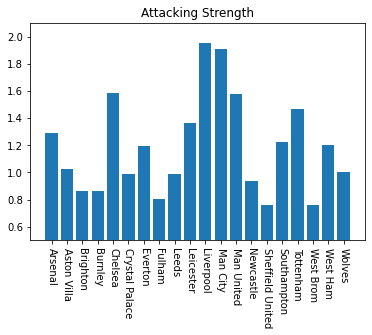

In [9]:
import matplotlib.pyplot as plt
plt.bar(x=range(20), height=PL.alpha_hat, tick_label=PL.teams)
plt.xticks(rotation=270)
plt.ylim(0.5, 2.1)
plt.title('Attacking Strength')
plt.show()

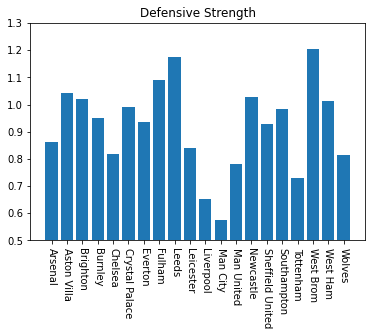

In [10]:
plt.bar(x=range(20), height=PL.beta_hat, tick_label=PL.teams)
plt.xticks(rotation=270)
plt.ylim(0.5, 1.3)
plt.title('Defensive Strength')
plt.show()

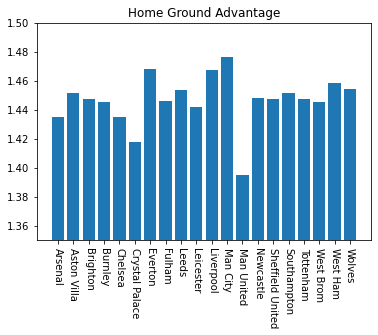

In [11]:
plt.bar(x=range(20), height=PL.gamma_hat, tick_label=PL.teams)
plt.xticks(rotation=270)
plt.ylim(1.35, 1.5)
plt.title('Home Ground Advantage')
plt.show()

In [8]:
league_BS, league_LS = [], []
for i in np.unique(PL.trained_data['SEA']):
    league_data = PL.trained_data[PL.trained_data['SEA']==i]
    avg_BS = np.mean(league_data['BS'])
    avg_LS = np.mean(league_data['LS'])
    league_BS.append(avg_BS)
    league_LS.append(avg_LS)

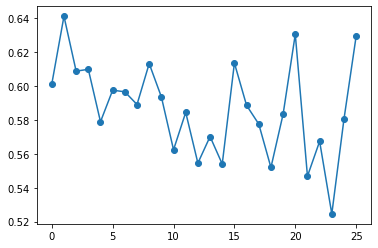

In [9]:
plt.plot(league_BS, marker='o')
plt.show()

In [94]:
PL4 = league()
PL4.train_all(league_str='E0', SEA=list(range(1996, 2021)))
# 2020/2021 season
new_data = pd.read_csv("https://www.football-data.co.uk/mmz4281/2021/E0.csv")
PL4.new_season(teams_out=['Bournemouth', 'Norwich', 'Watford'], teams_promoted_in=['Fulham','Leeds', 'West Brom'])
PL4.p_gamma = np.array([101]*20, dtype=float)
PL4.q_gamma = np.array([100]*20, dtype=float)
PL4.gamma_hat = (PL4.p_gamma-1)/PL4.q_gamma
PL4.train(new_data)
PL4.trained_data['SEA'][9500:]=2021

Training Complete


<ipython-input-94-23136a71f09f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PL4.trained_data['SEA'][9500:]=2021


values of 101 and 100 give BS of 0.6122

In [92]:
np.mean(PL.trained_data[PL.trained_data['SEA']==2021]['BS']), np.mean(PL4.trained_data[PL4.trained_data['SEA']==2021]['BS'])

(0.6293640927935432, 0.6122291648184868)

Mean BS: 0.5852370620065007


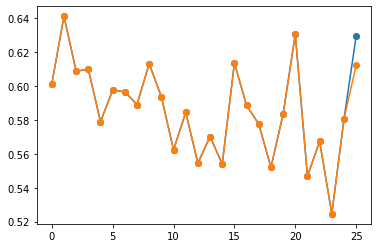

In [88]:
print('Mean BS: {}'.format(np.mean(PL4.trained_data['BS'])))
league_BS1, league_LS1 = [], []
for i in np.unique(PL4.trained_data['SEA']):
    league_data1 = PL4.trained_data[PL4.trained_data['SEA']==i]
    avg_BS1 = np.mean(league_data1['BS'])
    avg_LS1 = np.mean(league_data1['LS'])
    league_BS1.append(avg_BS1)
    league_LS1.append(avg_LS1)
    
plt.plot(league_BS, marker='o')
plt.plot(league_BS1, marker='o')
plt.show()

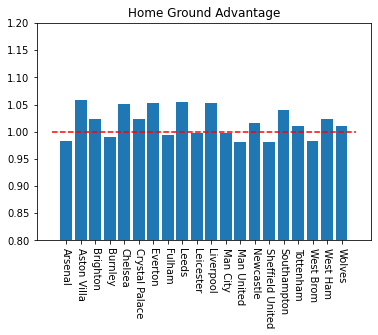

In [96]:
plt.bar(x=range(20), height=PL4.gamma_hat, tick_label=PL4.teams)
plt.xticks(rotation=270)
plt.plot([-1,20], [1,1], 'r--')
plt.ylim(0.8, 1.2)
plt.title('Home Ground Advantage')
plt.show()